In [193]:
import pandas as pd
dataset = pd.read_csv("./Dataset .csv")
dataset.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [195]:
dataset.duplicated(['Longitude', 'Latitude']).sum()

846

In [197]:
data = dataset.drop_duplicates(['Longitude', 'Latitude'],keep='first')

In [199]:
import folium
sample_data_map = data.sample(frac=0.05, random_state=1)
avg_lat = sample_data_map['Latitude'].mean()
avg_lon = sample_data_map['Longitude'].mean()
map = folium.Map(location=[avg_lat, avg_lon], zoom_start=5)
for i, row in sample_data_map.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], 
                  popup=row['Restaurant Name']).add_to(map)
map

In [200]:
group_city = data.groupby('City')
concentration = group_city.size().reset_index(name='Count').sort_values(by='Count', ascending=False)
concentration.head()

,City,Count
88,New Delhi,5042
50,Gurgaon,1015
89,Noida,904
43,Faridabad,222
48,Ghaziabad,24


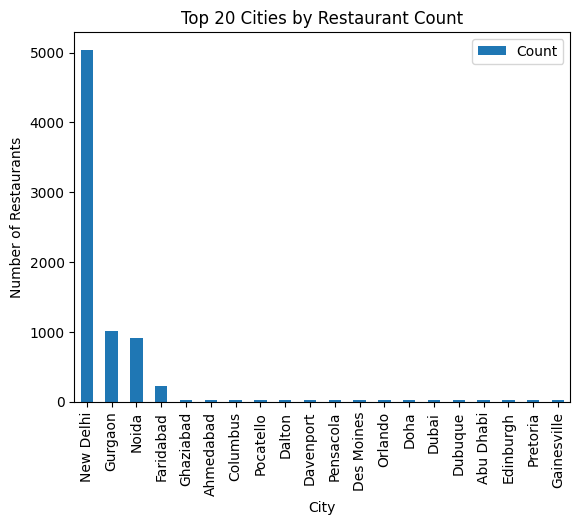

In [201]:
import matplotlib.pyplot as plt
concentration.head(20).plot(kind='bar', x='City', y='Count', title="Top 20 Cities by Restaurant Count")
plt.ylabel('Number of Restaurants')
plt.show()

In [204]:
stat = group_city[['Aggregate rating', 'Price range', 'Average Cost for two']].describe()
stat

Aggregate rating                      ... Average Cost for two                 
                           count      mean       std  ...                  50%      75%     max
City                                                  ...                                      
Abu Dhabi                   20.0  4.300000  0.319539  ...                165.0   250.00   500.0
Agra                        13.0  3.992308  0.411221  ...                700.0  1000.00  3600.0
Ahmedabad                   21.0  4.161905  0.285440  ...                900.0  1000.00  1800.0
Albany                      20.0  3.555000  0.187715  ...                 10.0    25.00    70.0
Allahabad                   15.0  3.406667  0.148645  ...                500.0   500.00  1000.0
...                          ...       ...       ...  ...                  ...      ...     ...
Weirton                      1.0  3.900000       NaN  ...                 25.0    25.00    25.0
Wellington City             20.0  4.250000  0.203909  ...                 57.5    82.50   200.0
Winchester Bay               1.0  3.200000       NaN  ...                 25.0    25.00    25.0
Yorkton                      1.0  3.300000       NaN  ...                 25.0    25.00    25.0
��stanbul                   14.0  4.292857  0.397036  ...                 80.0   101.25   170.0

[141 rows x 24 columns]

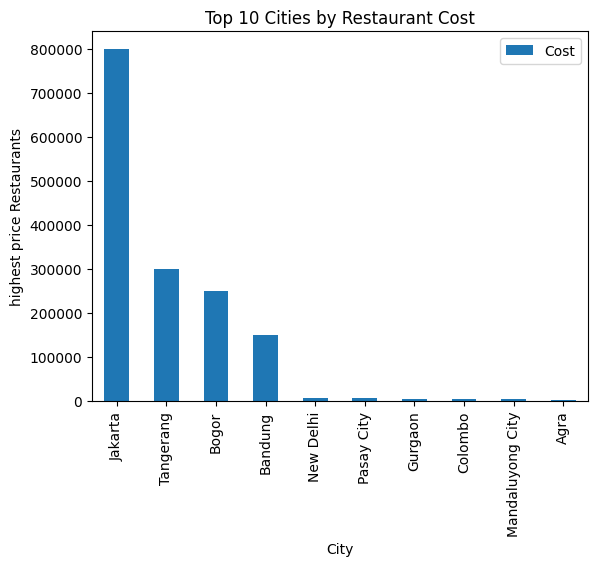

In [211]:
most_expensive_city = stat['Average Cost for two']['max'].sort_values(ascending=False).reset_index(name='Cost')
most_expensive_city.head(10).plot(kind='bar', x='City', y='Cost', title="Top 10 Cities by Restaurant Cost")
plt.ylabel('highest price Restaurants')
plt.show()